In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import kagglehub

# Download latest version
path = kagglehub.dataset_download("amldvvs/avocado-ripeness-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\amldvvs\avocado-ripeness-classification-dataset\versions\1


In [7]:
import os
for file in os.listdir(path):
    print(file)
    dataset = pd.read_csv(os.path.join(path, file))
    
dataset.head()

avocado_ripeness_dataset.csv


,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [8]:
dataset["density"] = round(dataset["weight_g"] / dataset["size_cm3"] , 2)

In [9]:
encode_columns = pd.get_dummies(dataset[["color_category"]]).astype(int)
encode_columns

,color_category_black,color_category_dark green,color_category_green,color_category_purple
0,1,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
245,0,1,0,0
246,1,0,0,0
247,1,0,0,0
248,0,0,1,0


In [10]:
df = pd.concat([dataset, encode_columns], axis=1)
try:
    df.drop(columns=["color_category"], inplace=True)
except:
    pass
try:
    df.drop(columns=["hue","saturation","brightness"], inplace=True)
except:
    pass
df

,firmness,sound_db,weight_g,size_cm3,ripeness,density,color_category_black,color_category_dark green,color_category_green,color_category_purple
0,14.5,34,175,261,ripe,0.67,1,0,0,0
1,71.7,69,206,185,pre-conditioned,1.11,0,0,1,0
2,88.5,79,220,143,hard,1.54,0,1,0,0
3,93.8,75,299,140,hard,2.14,0,1,0,0
4,42.5,63,200,227,breaking,0.88,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
245,94.1,72,254,134,hard,1.90,0,1,0,0
246,21.6,47,182,240,firm-ripe,0.76,1,0,0,0
247,14.0,37,188,274,ripe,0.69,1,0,0,0
248,61.5,65,261,162,pre-conditioned,1.61,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=["weight_g", "size_cm3","ripeness"])
y = df["ripeness"]

X.shape, y.shape

((250, 7), (250,))

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 7), (50, 7), (200,), (50,))

In [13]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

svc = SVC(kernel="linear", C=0.1, gamma="scale", random_state=42)
svc.fit(X_train, y_train)

SVC(C=0.1, kernel='linear', random_state=42)

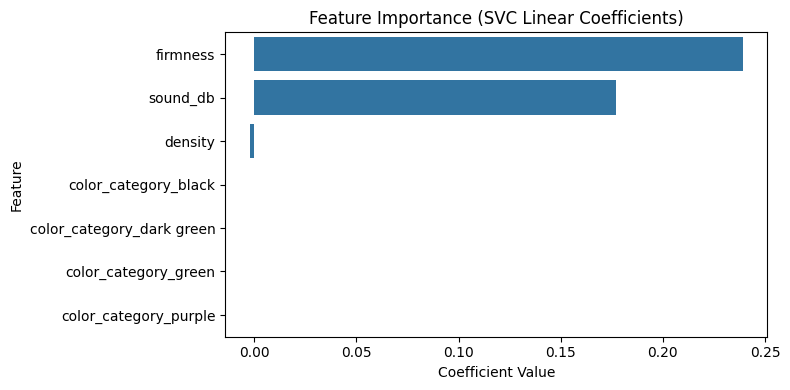

In [16]:
importances = svc.coef_[0]
feature_names = X.columns

plt.figure(figsize=(8, 4))
sns.barplot(x=importances, y=feature_names, orient='h')
plt.title("Feature Importance (SVC Linear Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [20]:
X = df[["firmness", "sound_db"]]
y = df["ripeness"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((200, 2), (50, 2), (200,), (50,))

In [21]:
model = RandomForestClassifier(n_estimators=50 , criterion="gini")
model.fit(X_train, y_train)
model.score(X_test, y_test)

1.0

                 precision    recall  f1-score   support

       breaking       1.00      1.00      1.00        10
      firm-ripe       1.00      1.00      1.00         9
           hard       1.00      1.00      1.00         9
pre-conditioned       1.00      1.00      1.00        12
           ripe       1.00      1.00      1.00        10

       accuracy                           1.00        50
      macro avg       1.00      1.00      1.00        50
   weighted avg       1.00      1.00      1.00        50



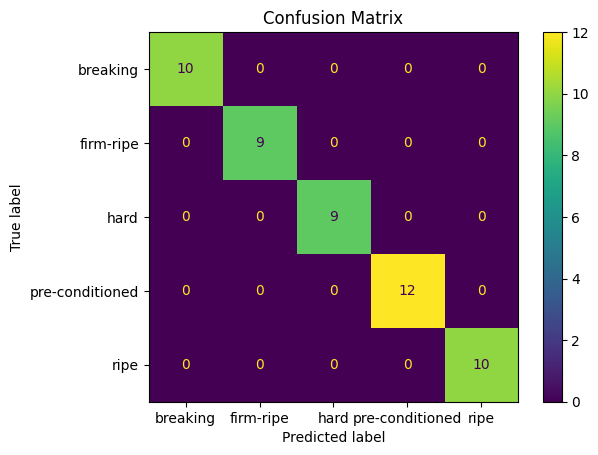

In [22]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=model.classes_)
plt.title("Confusion Matrix")
plt.show()